# Tensorflow VS PyTorch

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Datashape: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("Class Count: ", len(np.bincount(y_train)))

11493376/11490434 [==============================] - 0s 0us/step
Datashape:  (60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
Class Count:  10


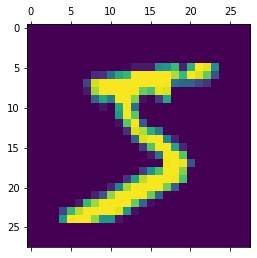

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])

In [ ]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

In [ ]:
inp = tf.keras.layers.Input([28,28,1])
x = tf.keras.layers.Conv2D(64, (3, 3), activation="relu")(inp)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
out = tf.keras.layers.Dense(10,activation="softmax")(x)

In [ ]:
model = tf.keras.Model(inp, out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1024

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
model.fit(
    x = x_train,
    y = y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/100
 11/750 [..............................] - ETA: 1:33 - loss: 2.4412 - acc: 0.1084